In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import dates
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

df_property_1 = pd.read_csv("cleaned1_property_sales.csv")

C:\Users\jahli\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<AxesSubplot:ylabel='Frequency'>

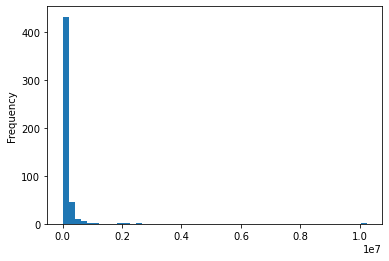

In [3]:
headp = df_property_1.head()
df_property_1["PRICE"].head(500).plot.hist(bins=50)

In [5]:
df_property_1["PRICE"].dtypes

dtype('float64')

In [6]:
df_property_1["SALEDATE"].dtypes

dtype('O')

In [7]:
df_property_t = pd.to_datetime(df_property_1["SALEDATE"])

In [8]:
df_property_1["SALEDATE-TEST"] = pd.to_datetime(df_property_1["SALEDATE"])
#df_property_1["SALEDATE-TEST"] = dates.datestr2num(df_property_1["SALEDATE"])
x = df_property_1["SALEDATE-TEST"]

KeyboardInterrupt: 

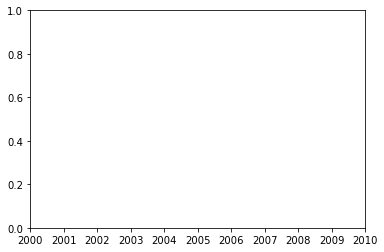

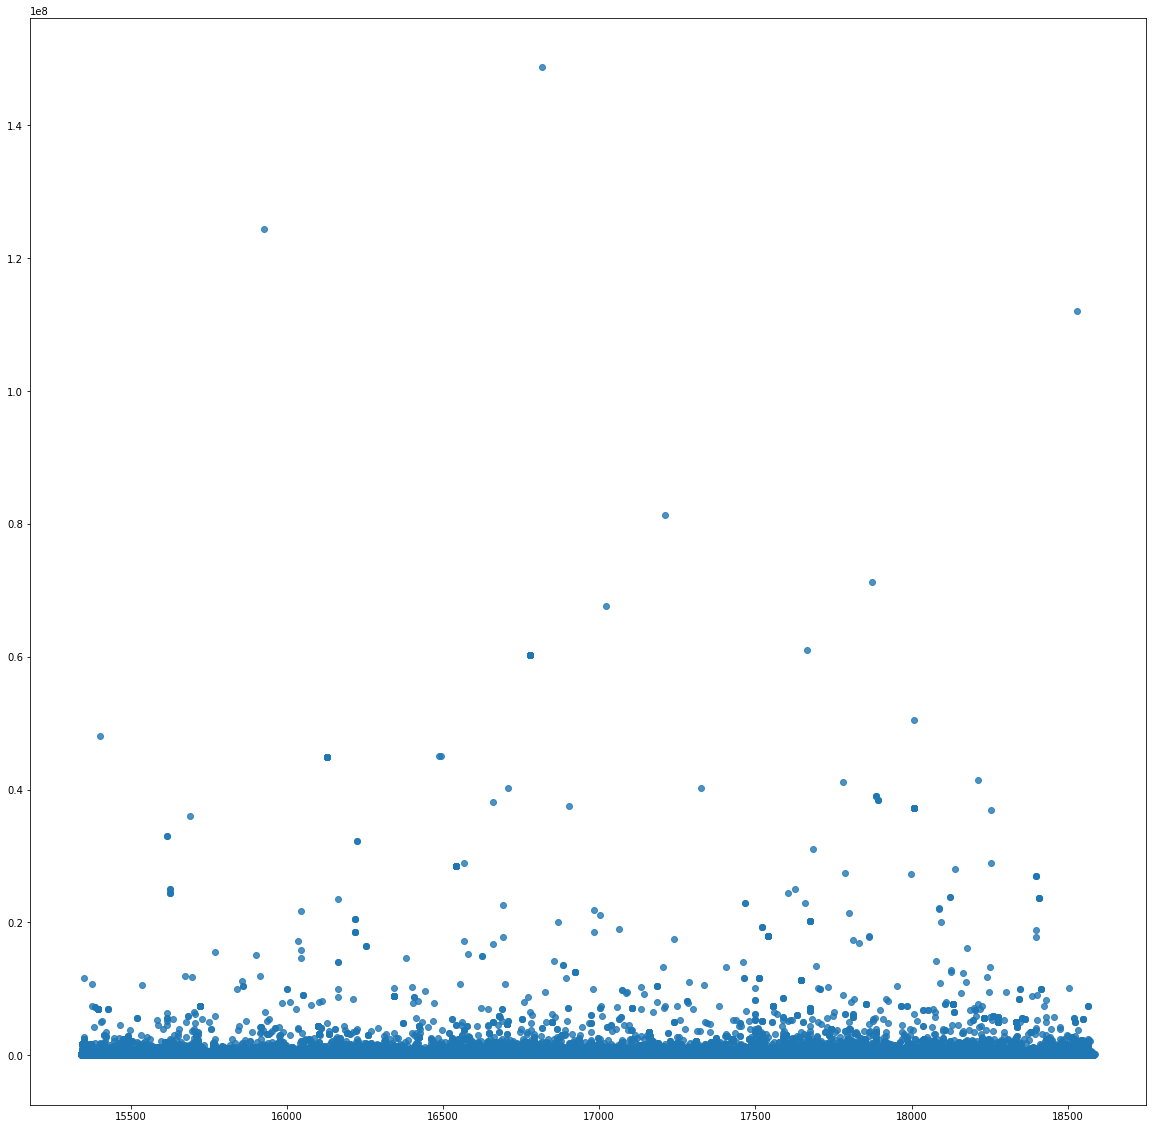

In [9]:
f, ax = plt.subplots()
ax.xaxis.update_units(x)
fig_dim = (20, 20)
fig, a = plt.subplots(figsize = fig_dim)
sns.regplot(x = ax.xaxis.convert_units(x), y = "PRICE", data = df_property_1, ax = a)

In [10]:
df_property_1["SALEDATE-TEST"].dtypes

dtype('<M8[ns]')

In [25]:
df_property_1["SALEDATE"]

0         2012-09-27
1         2015-01-06
2         2012-10-26
3         2017-03-06
4         2015-02-04
             ...    
307751    2019-05-30
307752    2019-05-10
307753    2019-05-22
307754    2019-05-15
307755    2019-04-04
Name: SALEDATE, Length: 307756, dtype: object

In [26]:
df_property_1["SALEDATE"].dtypes

dtype('O')

In [29]:
df_property_1.columns

Index(['Unnamed: 0', 'PARID', 'PROPERTYHOUSENUM', 'PROPERTYFRACTION',
       'PROPERTYADDRESSDIR', 'PROPERTYADDRESSSTREET', 'PROPERTYADDRESSSUF',
       'PROPERTYADDRESSUNITDESC', 'PROPERTYUNITNO', 'PROPERTYCITY',
       'PROPERTYSTATE', 'PROPERTYZIP', 'SCHOOLCODE', 'SCHOOLDESC', 'MUNICODE',
       'MUNIDESC', 'RECORDDATE', 'SALEDATE', 'PRICE', 'DEEDBOOK', 'DEEDPAGE',
       'SALECODE', 'SALEDESC', 'INSTRTYP', 'INSTRTYPDESC', 'PROPERTyCITY',
       'SALEDATE-TEST'],
      dtype='object')

In [11]:
l_df_property_1 = df_property_1["PRICE"]
I_df_property_1 = df_property_1.set_index("SALEDATE")

In [12]:
df_property_1["PRICE_LOG"] = df_property_1["PRICE"].copy()
df_property_1["PRICE_LOG"] = df_property_1["PRICE_LOG"] + .001
df_property_1["PRICE_LOG"] = np.log(df_property_1["PRICE_LOG"])

In [13]:
df_property_1["PRICE_LOG"]

0         11.695247
1          7.486053
2          8.443116
3         -6.907755
4         10.223431
            ...    
307751     0.001000
307752    11.982929
307753    15.285686
307754    12.341477
307755    11.461632
Name: PRICE_LOG, Length: 307756, dtype: float64

In [15]:
df_property_1["SALEDATE"].sort_values()

29810     2012-01-01
12258     2012-01-01
671       2012-01-01
670       2012-01-01
669       2012-01-01
             ...    
255444    2020-11-16
291157    2020-11-16
257246    2020-11-19
295358    2020-11-19
279904    2020-11-23
Name: SALEDATE, Length: 307756, dtype: object

In [22]:
df_property_1.to_csv("cleaned1_property_sales.csv")

In [ ]:
sns.stripplot(x = "SALEDATE-TEST", y = "PRICE", data = df_property_1)

In [8]:
df_property_1[["PRICE", "SALEDATE-TEST"]]

,PRICE,SALEDATE-TEST
0,120000.0,2012-09-27
1,1783.0,2015-01-06
2,4643.0,2012-10-26
3,0.0,2017-03-06
4,27541.0,2015-02-04
...,...,...
307751,1.0,2019-05-30
307752,160000.0,2019-05-10
307753,4350000.0,2019-05-22
307754,229000.0,2019-05-15


In [9]:
df_property_2 = df_property_1[["PRICE","SALEDATE-TEST"]]

<AxesSubplot:xlabel='SALEDATE-TEST', ylabel='PRICE'>

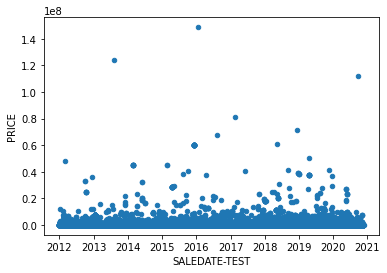

In [25]:
df_property_2.plot(x= "SALEDATE-TEST", y = "PRICE", kind = "scatter")

<AxesSubplot:xlabel='PROPERTYCITY'>

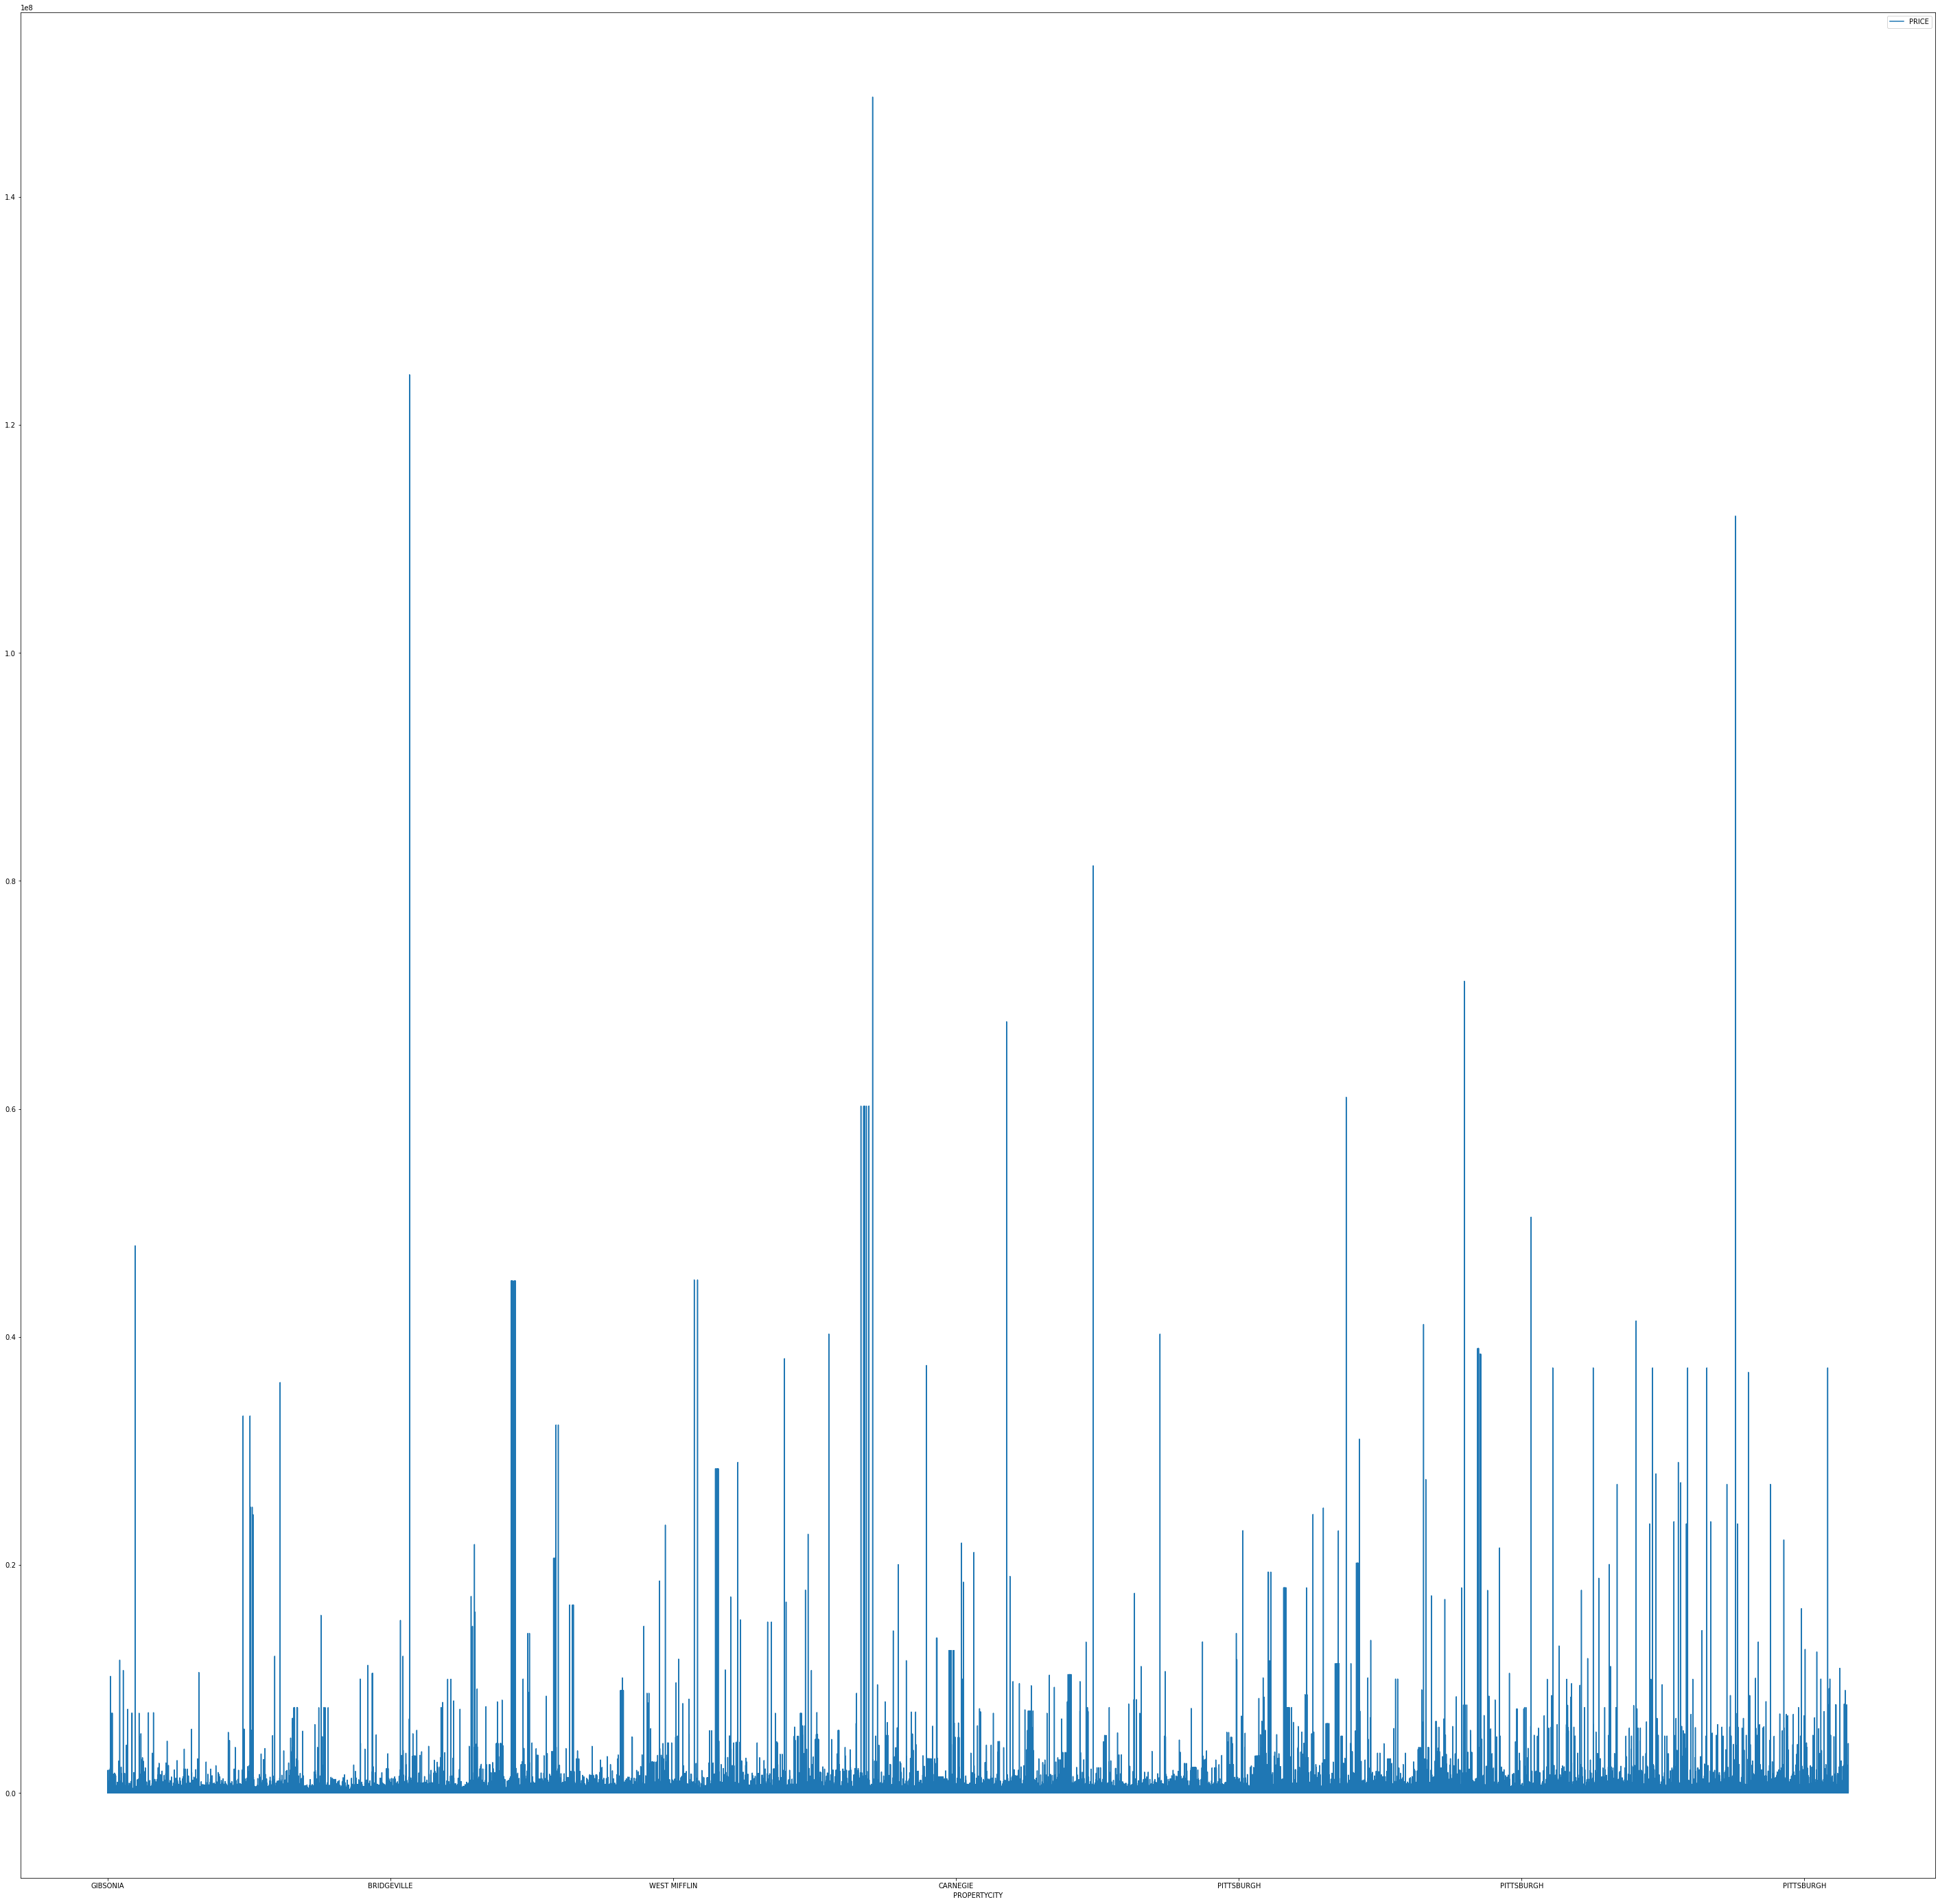

In [35]:
df_property_1.plot("PROPERTYCITY", y = "PRICE", figsize = (50, 50))

In [16]:
property_mean = df_property_1[["PRICE", "PROPERTYCITY"]].groupby("PROPERTYCITY").mean()

<AxesSubplot:xlabel='PROPERTYCITY'>

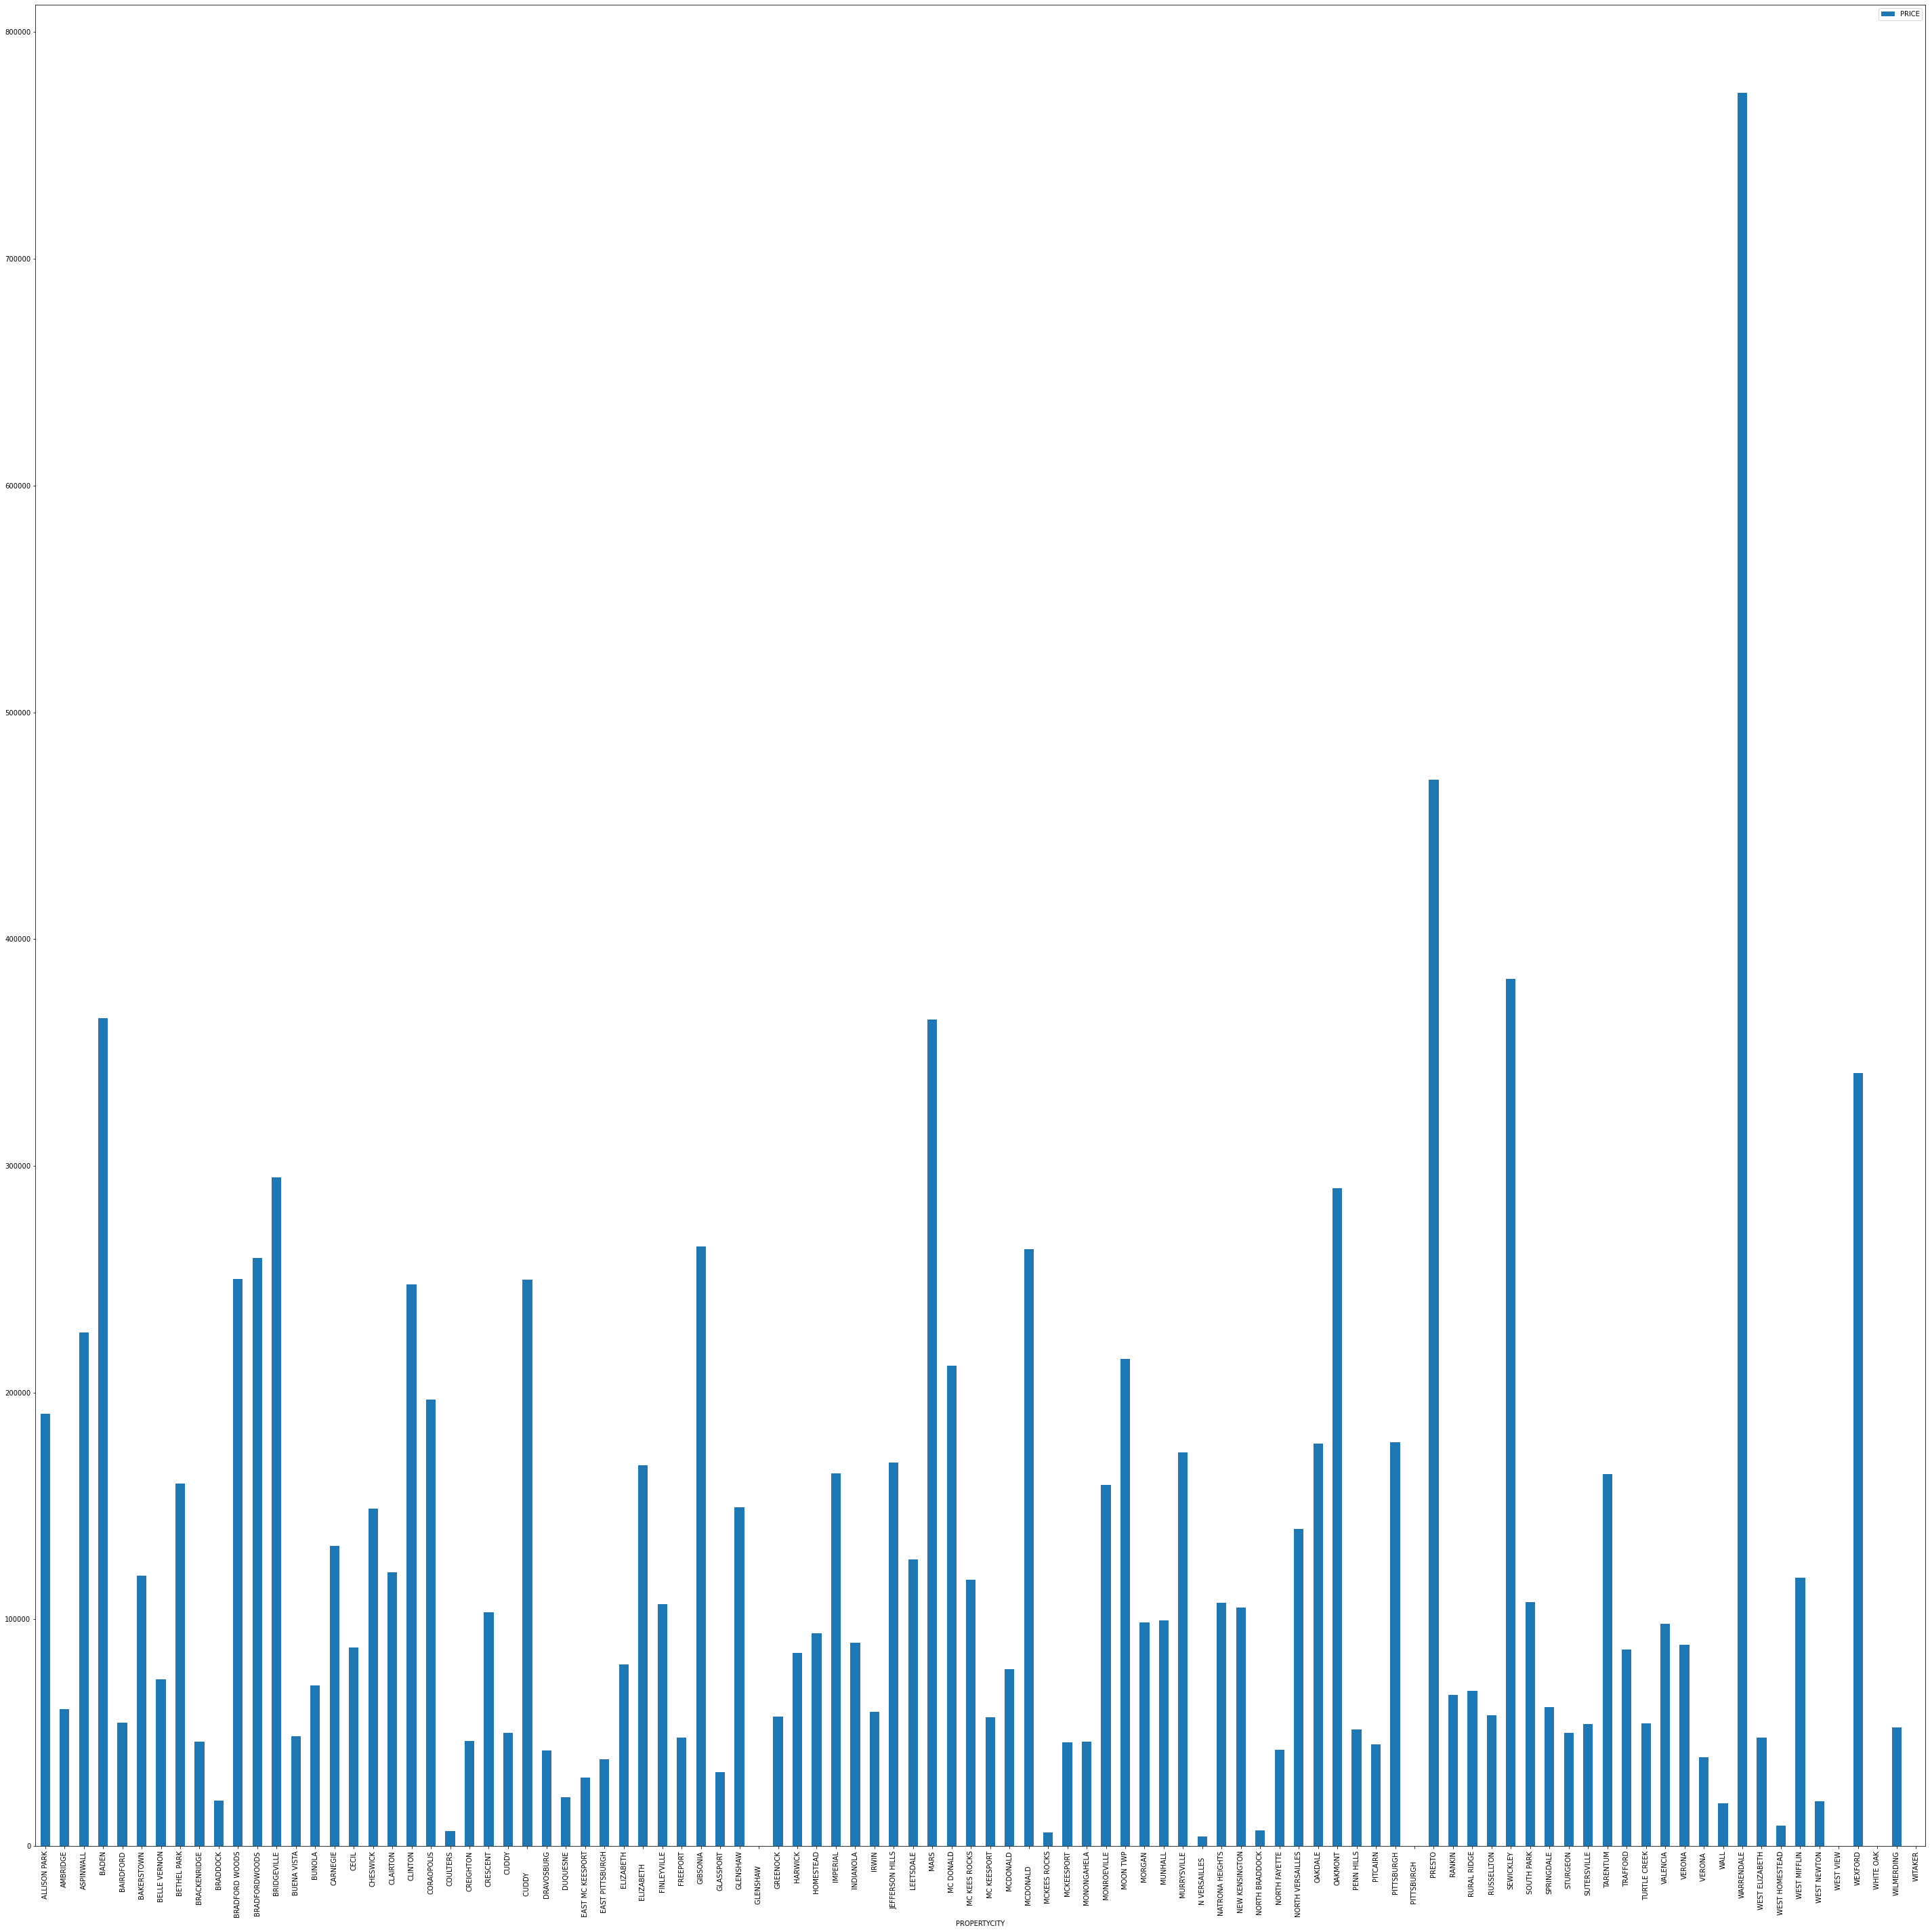

In [17]:
property_mean.plot.bar(figsize =(50,50))

In [49]:
school_mean = df_property_1[["PRICE", "SCHOOLDESC"]].groupby("SCHOOLDESC").mean()

In [70]:
log_mean = df_property_1[["PRICE_LOG", "SALEDATE-TEST"]].groupby("SALEDATE-TEST").mean()

,PRICE_LOG
SALEDATE-TEST,
2012-01-01,11.004789
2012-01-03,7.160232
2012-01-04,9.043748
2012-01-05,8.261964
2012-01-06,7.016541
...,...
2020-11-13,12.493817
2020-11-14,4.605180
2020-11-16,11.522269


In [ ]:
df_property_1["PRICE_LOG"].plot()

In [73]:
df_property_1                                                            

,Unnamed: 0,Unnamed: 0.1,PARID,PROPERTYHOUSENUM,PROPERTYFRACTION,PROPERTYADDRESSDIR,PROPERTYADDRESSSTREET,PROPERTYADDRESSSUF,PROPERTYADDRESSUNITDESC,PROPERTYUNITNO,...,PRICE,DEEDBOOK,DEEDPAGE,SALECODE,SALEDESC,INSTRTYP,INSTRTYPDESC,PROPERTyCITY,PRICE_LOG,SALEDATE-TEST
0,0,0,1075F00108000000,4720.0,,NaN,HIGHPOINT,DR,NaN,NaN,...,120000.0,15020,356.0,3,LOVE AND AFFECTION SALE,DE,DEED,Nan,11.695247,2012-09-27
1,1,1,0011A00237000000,0.0,,NaN,LOMBARD,ST,NaN,NaN,...,1783.0,TR15,2.0,2,CITY TREASURER SALE,TS,TREASURER DEED,Nan,7.486053,2015-01-06
2,2,2,0011J00047000000,1903.0,,NaN,FORBES,AVE,NaN,NaN,...,4643.0,TR13,3.0,2,CITY TREASURER SALE,TS,TREASURER DEED,Nan,8.443116,2012-10-26
3,3,3,0113B00029000000,479.0,,NaN,ROOSEVELT,AVE,NaN,NaN,...,0.0,16739,166.0,3,LOVE AND AFFECTION SALE,CO,CORRECTIVE DEED,Nan,-6.907755,2017-03-06
4,4,4,0119S00024000000,5418.0,,NaN,CARNEGIE,ST,NaN,NaN,...,27541.0,TR15,59.0,GV,GOVERNMENT SALE,TS,TREASURER DEED,Nan,10.223431,2015-02-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307751,307751,307751,0424D00020000000,0.0,,NaN,FREEDOM,LN,NaN,NaN,...,1.0,17660,225.0,H,MULTI-PARCEL SALE,DE,DEED,Nan,0.001000,2019-05-30
307752,307752,307752,0115B00050000000,466.0,,NaN,WABANA,ST,NaN,NaN,...,160000.0,17625,482.0,9,OTHER INVALID SALES INDICATED,DE,DEED,Nan,11.982929,2019-05-10
307753,307753,307753,0028P00027000000,300.0,,NaN,CRAFT,AVE,NaN,NaN,...,4350000.0,17624,408.0,H,MULTI-PARCEL SALE,DE,DEED,Nan,15.285686,2019-05-22
307754,307754,307754,0613B00301000000,1230.0,,NaN,BINGAY,DR,NaN,NaN,...,229000.0,17624,426.0,9,OTHER INVALID SALES INDICATED,DE,DEED,Nan,12.341477,2019-05-15


In [4]:
mean_date = pd.date_range('2012-01-01', '2021-01-01', freq= 'AS-JAN')

In [20]:
sale_year = pd.DatetimeIndex(df_property_1["SALEDATE-TEST"]).year

In [21]:
df_property_1['SALE-YEAR'] = sale_year

In [95]:
log_year = df_property_1[["PRICE_LOG", "SALE-YEAR"]].groupby("SALE-YEAR").mean()

<AxesSubplot:xlabel='SALE-YEAR'>

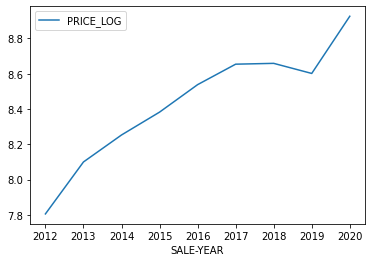

In [96]:
log_year.plot.line()

In [93]:
df_property_1.drop(columns = ["sale-year"])

,Unnamed: 0,Unnamed: 0.1,PARID,PROPERTYHOUSENUM,PROPERTYFRACTION,PROPERTYADDRESSDIR,PROPERTYADDRESSSTREET,PROPERTYADDRESSSUF,PROPERTYADDRESSUNITDESC,PROPERTYUNITNO,...,PRICE,DEEDBOOK,DEEDPAGE,SALECODE,SALEDESC,INSTRTYP,INSTRTYPDESC,PROPERTyCITY,PRICE_LOG,SALEDATE-TEST
0,0,0,1075F00108000000,4720.0,,NaN,HIGHPOINT,DR,NaN,NaN,...,120000.0,15020,356.0,3,LOVE AND AFFECTION SALE,DE,DEED,Nan,11.695247,2012-09-27
1,1,1,0011A00237000000,0.0,,NaN,LOMBARD,ST,NaN,NaN,...,1783.0,TR15,2.0,2,CITY TREASURER SALE,TS,TREASURER DEED,Nan,7.486053,2015-01-06
2,2,2,0011J00047000000,1903.0,,NaN,FORBES,AVE,NaN,NaN,...,4643.0,TR13,3.0,2,CITY TREASURER SALE,TS,TREASURER DEED,Nan,8.443116,2012-10-26
3,3,3,0113B00029000000,479.0,,NaN,ROOSEVELT,AVE,NaN,NaN,...,0.0,16739,166.0,3,LOVE AND AFFECTION SALE,CO,CORRECTIVE DEED,Nan,-6.907755,2017-03-06
4,4,4,0119S00024000000,5418.0,,NaN,CARNEGIE,ST,NaN,NaN,...,27541.0,TR15,59.0,GV,GOVERNMENT SALE,TS,TREASURER DEED,Nan,10.223431,2015-02-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307751,307751,307751,0424D00020000000,0.0,,NaN,FREEDOM,LN,NaN,NaN,...,1.0,17660,225.0,H,MULTI-PARCEL SALE,DE,DEED,Nan,0.001000,2019-05-30
307752,307752,307752,0115B00050000000,466.0,,NaN,WABANA,ST,NaN,NaN,...,160000.0,17625,482.0,9,OTHER INVALID SALES INDICATED,DE,DEED,Nan,11.982929,2019-05-10
307753,307753,307753,0028P00027000000,300.0,,NaN,CRAFT,AVE,NaN,NaN,...,4350000.0,17624,408.0,H,MULTI-PARCEL SALE,DE,DEED,Nan,15.285686,2019-05-22
307754,307754,307754,0613B00301000000,1230.0,,NaN,BINGAY,DR,NaN,NaN,...,229000.0,17624,426.0,9,OTHER INVALID SALES INDICATED,DE,DEED,Nan,12.341477,2019-05-15


In [97]:
df_property_1["PRICE"].describe()

count    3.077560e+05
mean     1.725544e+05
std      9.698147e+05
min      0.000000e+00
25%      6.990000e+02
50%      7.800000e+04
75%      1.849000e+05
max      1.487529e+08
Name: PRICE, dtype: float64

In [7]:
school = df_property_1[["PRICE", "SCHOOLDESC"]]

<AxesSubplot:xlabel='SCHOOLDESC'>

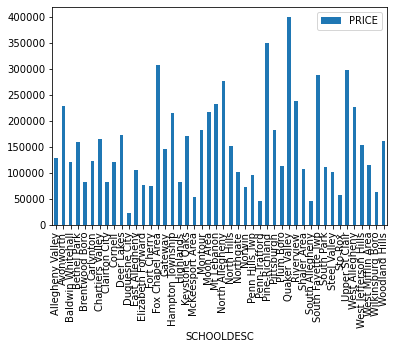

In [115]:
school_mean.plot.bar()

In [110]:
school

,PRICE,SCHOOLDESC
0,120000.0,Hampton Township
1,1783.0,Pittsburgh
2,4643.0,Pittsburgh
3,0.0,Northgate
4,27541.0,Pittsburgh
...,...,...
307751,1.0,Avonworth
307752,160000.0,Pittsburgh
307753,4350000.0,Pittsburgh
307754,229000.0,North Allegheny


In [23]:
price_log_amount = df_property_1[["PRICE_LOG", "SALE-YEAR"]].groupby("SALE-YEAR").count()

<AxesSubplot:xlabel='SALE-YEAR'>

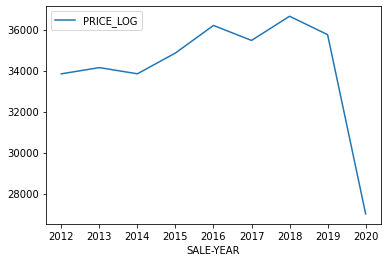

In [25]:
price_log_amount.plot.line()

In [27]:
price_amount = df_property_1[["PRICE", "SALE-YEAR"]].groupby("SALE-YEAR").count()

<AxesSubplot:xlabel='SALE-YEAR'>

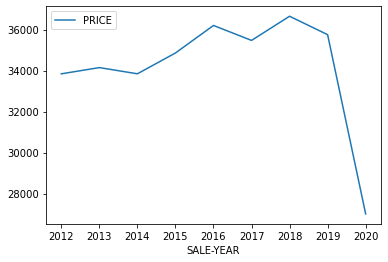

In [29]:
price_amount.plot.line()